# Clean up exercise 11/09 2024 by Ahmad Alkaseb

Status of each exercise:
* 32: DONE
* 33: DONE

In [81]:
# Import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [42]:
# Load the data into pandas dataframe using pandas library
df = pd.read_csv('weather.csv')

In [44]:
# One-hot encode all the columns that are ordinal data, and remove the first created column
df_dummies = pd.get_dummies(df, drop_first=True)

In [46]:
# Shuffle all the dummies data, and keep the random value to be the same every time
df_shuffled = shuffle(df_dummies, random_state=42)

In [48]:
# Split shuffled data into X and y
DV = 'Temperature_c' # Save the temperature column as DV, Dependt variabel
X = df_shuffled.drop(DV, axis=1) # Save all the columns into the x variabel and remove the DV's column
y = df_shuffled[DV] # Save the DV column into y

In [50]:
# Create the machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
# Scale X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
# Instantiate model
model = RandomForestRegressor(criterion=best_parameters['criterion'],
                              max_features=best_parameters['max_features'],
                              min_impurity_decrease=best_parameters['min_impurity_decrease'],
                              bootstrap=best_parameters['bootstrap'],
                              warm_start=best_parameters['warm_start'])

In [99]:
# Fit model
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features='sqrt')

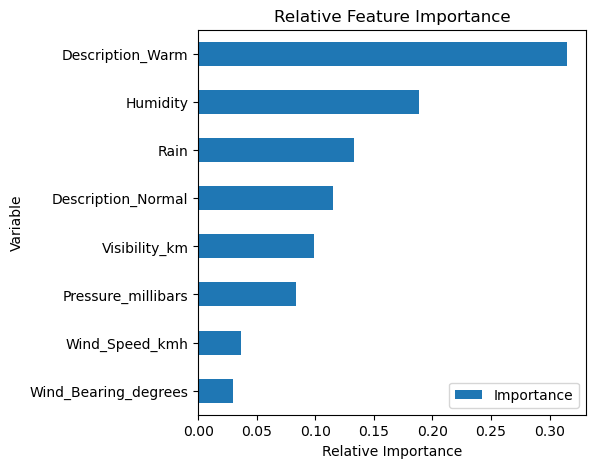

In [100]:
# Plot feature importance in descending order
df_imp = pd.DataFrame({'Importance': list(model.feature_importances_)}, index=X.columns)

# Sort dataframe
df_imp_sorted = df_imp.sort_values(by=('Importance'), ascending=True)

# Plot these
df_imp_sorted.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()